# What's Cooking: Cuisine Analysis and Prediction

Fetch train and test datasets into pandas dataframes.

In [3]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

train_df = pd.read_json("whats-cooking/train.json")
test_df = pd.read_json("whats-cooking/test.json")
train_df.pop('id')
print(train_df.shape)
train_df.head()

(39774, 2)


,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]"
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]"
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]"
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf]"


In [4]:
train_df.isnull().any()

cuisine        False
ingredients    False
dtype: bool

In [5]:
test_df.isnull().any()

id             False
ingredients    False
dtype: bool

Preprocess ingredient names by removing numbers, certain adjectives, and measurement units.

In [6]:
import re

def clean_ingredient_labels(ingredients):
    cleaned_ingredients = []
    for ingredient in ingredients:
        # Remove numbers and symbols, keep only alphabet
        ingredient = re.sub(r'[^A-Za-z]', ' ', ingredient)
        # Remove specific words and 
        ingredient = re.sub(r'\(.*oz.\)|crushed|crumbles|ground|minced|powder|chopped|sliced|frozen|diced|large|freshly', '', ingredient)
        ingredient = ingredient.strip()  # Remove leading and trailing spaces
        if ingredient:
            cleaned_ingredients.append(ingredient)
    return cleaned_ingredients

train_df['ingredients'] = train_df['ingredients'].apply(clean_ingredient_labels)

There are no missing values, so let's proceed with data analysis.

## Exploratory Data Analysis

View all unique ingredients and how many times they appear.

In [7]:
from collections import Counter
total_ingredients = [ingr for lists in train_df["ingredients"] for ingr in lists]
ingredients_counter = Counter(total_ingredients)
print(f"Total unique ingredients: {len(ingredients_counter)}")
print(ingredients_counter.most_common(10))

Total unique ingredients: 6464
[('salt', 18049), ('garlic', 10857), ('onions', 8214), ('olive oil', 7972), ('water', 7457), ('black pepper', 7412), ('garlic cloves', 7110), ('sugar', 6434), ('eggs', 6336), ('pepper', 5772)]


Visualize top 20 ingredients in a bar chart.

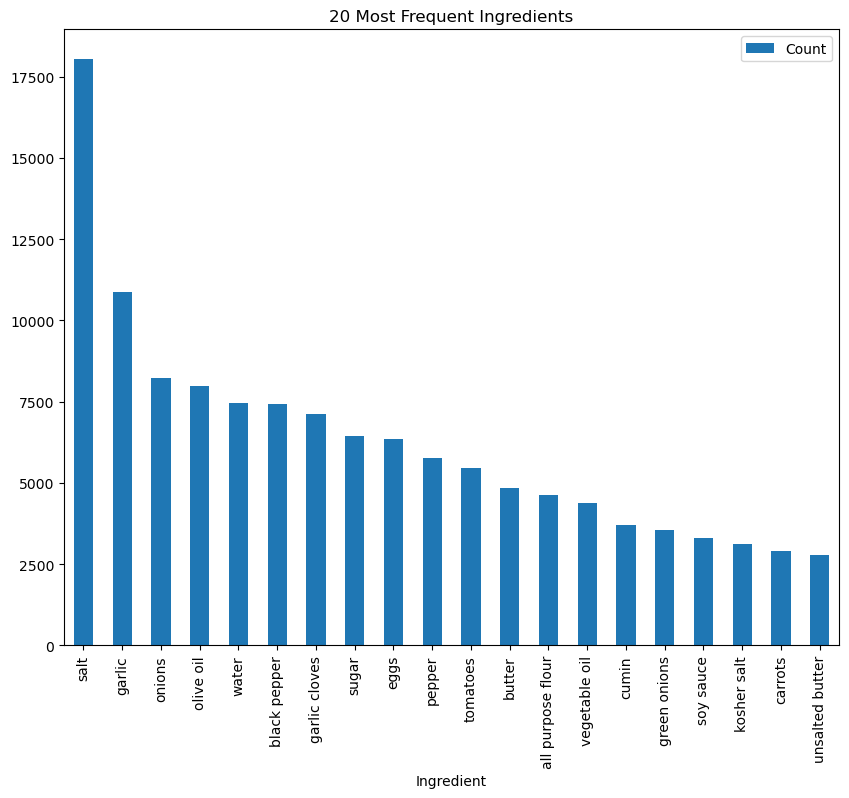

In [8]:
import matplotlib.pyplot as plt # ploting library
%matplotlib inline
# now let's split all recipes ti have list of ingredients

fig, ax = plt.subplots(figsize=(10,8))
top_20 = ingredients_counter.most_common(20)
df = pd.DataFrame(top_20, columns = ['Ingredient', 'Count'])
df.plot.bar(x='Ingredient',y='Count', ax=ax)
plt.title('20 Most Frequent Ingredients')
plt.show()

Some ingredients are basically the same with slightly different labels (e.g. black pepper & freshly ground black pepper). So let's also look the 20 most common words in the ingredients list.

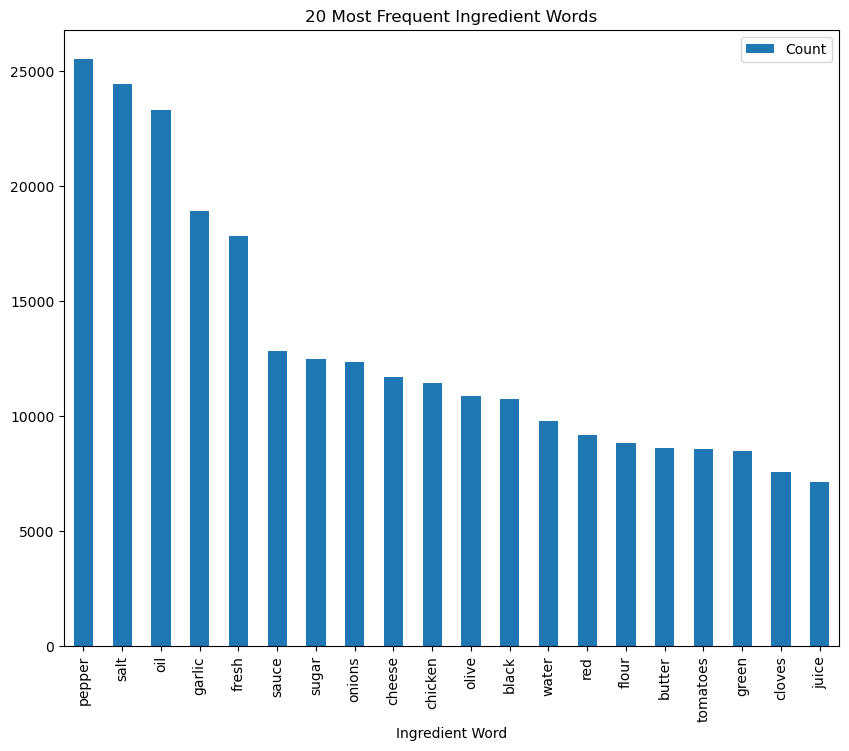

In [9]:
words = [ingr.split() for ingr in total_ingredients]
word_counter = Counter([word for ingr in words for word in ingr])

fig, ax = plt.subplots(figsize=(10,8))
top_20_words = word_counter.most_common(20)
df = pd.DataFrame(top_20_words, columns = ['Ingredient Word', 'Count'])
df.plot.bar(x='Ingredient Word',y='Count', ax=ax)
plt.title('20 Most Frequent Ingredient Words')
plt.show()

We can see that the most common ingredients are basic flavoring and assisting ingredients like pepper, salt, oil, etc.
Interestingly pepper (which can be black pepper, bell pepper, etc.) appears to be more common than salt! Let's investigate this a little by checking if there are recipes which have "pepper" but no salt.

In [10]:
pepper_df = train_df[train_df['ingredients'].apply(lambda x: any('pepper' in item for item in x))]
pepper_df = pepper_df[~pepper_df['ingredients'].apply(lambda x: any('salt' in item for item in x))]
pepper_df.head(20)

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese]"
10,italian,"[pimentos, sweet pepper, dried oregano, olive oil, garlic, sharp cheddar cheese, pepper, swiss cheese, provolone cheese, canola oil, mushrooms, black olives, sausages]"
11,chinese,"[low sodium soy sauce, fresh ginger, dry mustard, green beans, white pepper, sesame oil, scallions, canola oil, sugar, Shaoxing wine, garlic, turkey, water, red pepper flakes, corn starch]"
15,indian,"[tumeric, vegetable stock, tomatoes, garam masala, naan, red lentils, red chili peppers, onions, spinach, sweet potatoes]"
23,chinese,"[sesame seeds, red pepper, yellow peppers, water, extra firm tofu, broccoli, soy sauce, orange bell pepper, arrowroot, fresh ginger, sesame oil, red curry paste]"
24,italian,"[marinara sauce, flat leaf parsley, olive oil, linguine, capers, red pepper flakes, olives, lemon zest, garlic]"
26,cajun_creole,"[herbs, lemon juice, fresh tomatoes, paprika, mango, stock, chile pepper, onions, red chili peppers, oil]"
28,chinese,"[green bell pepper, egg roll wrappers, sweet and sour sauce, corn starch, molasses, vegetable oil, oil, soy sauce, shredded cabbage, garlic, onions, fresh ginger root, pork, carrots]"
31,cajun_creole,"[chicken broth, chicken breasts, hot sauce, red bell pepper, potatoes, bacon, garlic cloves, fresh parsley, andouille sausage, cajun seasoning, peanut oil, celery, red pepper, all purpose flour, shrimp, onions]"
33,thai,"[eggs, shallots, firm tofu, beansprouts, turnips, palm sugar, vegetable oil, garlic cloves, chicken, fish sauce, lime wedges, roasted peanuts, green papaya, chile, black pepper, tamarind paste, chinese chives]"


These are mainly recipes that have other sources of salt such as cheese and soy sauce.

Finding out number of unique cuisines.

In [11]:
all_cuisines = train_df['cuisine'].tolist()
cuisine_counter = Counter(all_cuisines)
print(f"Number of unique cuisines: {len(cuisine_counter)}")
print(cuisine_counter)

Number of unique cuisines: 20
Counter({'italian': 7838, 'mexican': 6438, 'southern_us': 4320, 'indian': 3003, 'chinese': 2673, 'french': 2646, 'cajun_creole': 1546, 'thai': 1539, 'japanese': 1423, 'greek': 1175, 'spanish': 989, 'korean': 830, 'vietnamese': 825, 'moroccan': 821, 'british': 804, 'filipino': 755, 'irish': 667, 'jamaican': 526, 'russian': 489, 'brazilian': 467})


Let's find the most popular ingredients per cuisine.

In [12]:
counters = {}
for cuisine in cuisine_counter.keys():
    lsts = [ingredients for ingredients in train_df[train_df['cuisine'] == cuisine]['ingredients']]
    ingredients = [item for ingrs in lsts for item in ingrs]
    counters[cuisine] = Counter(ingredients)

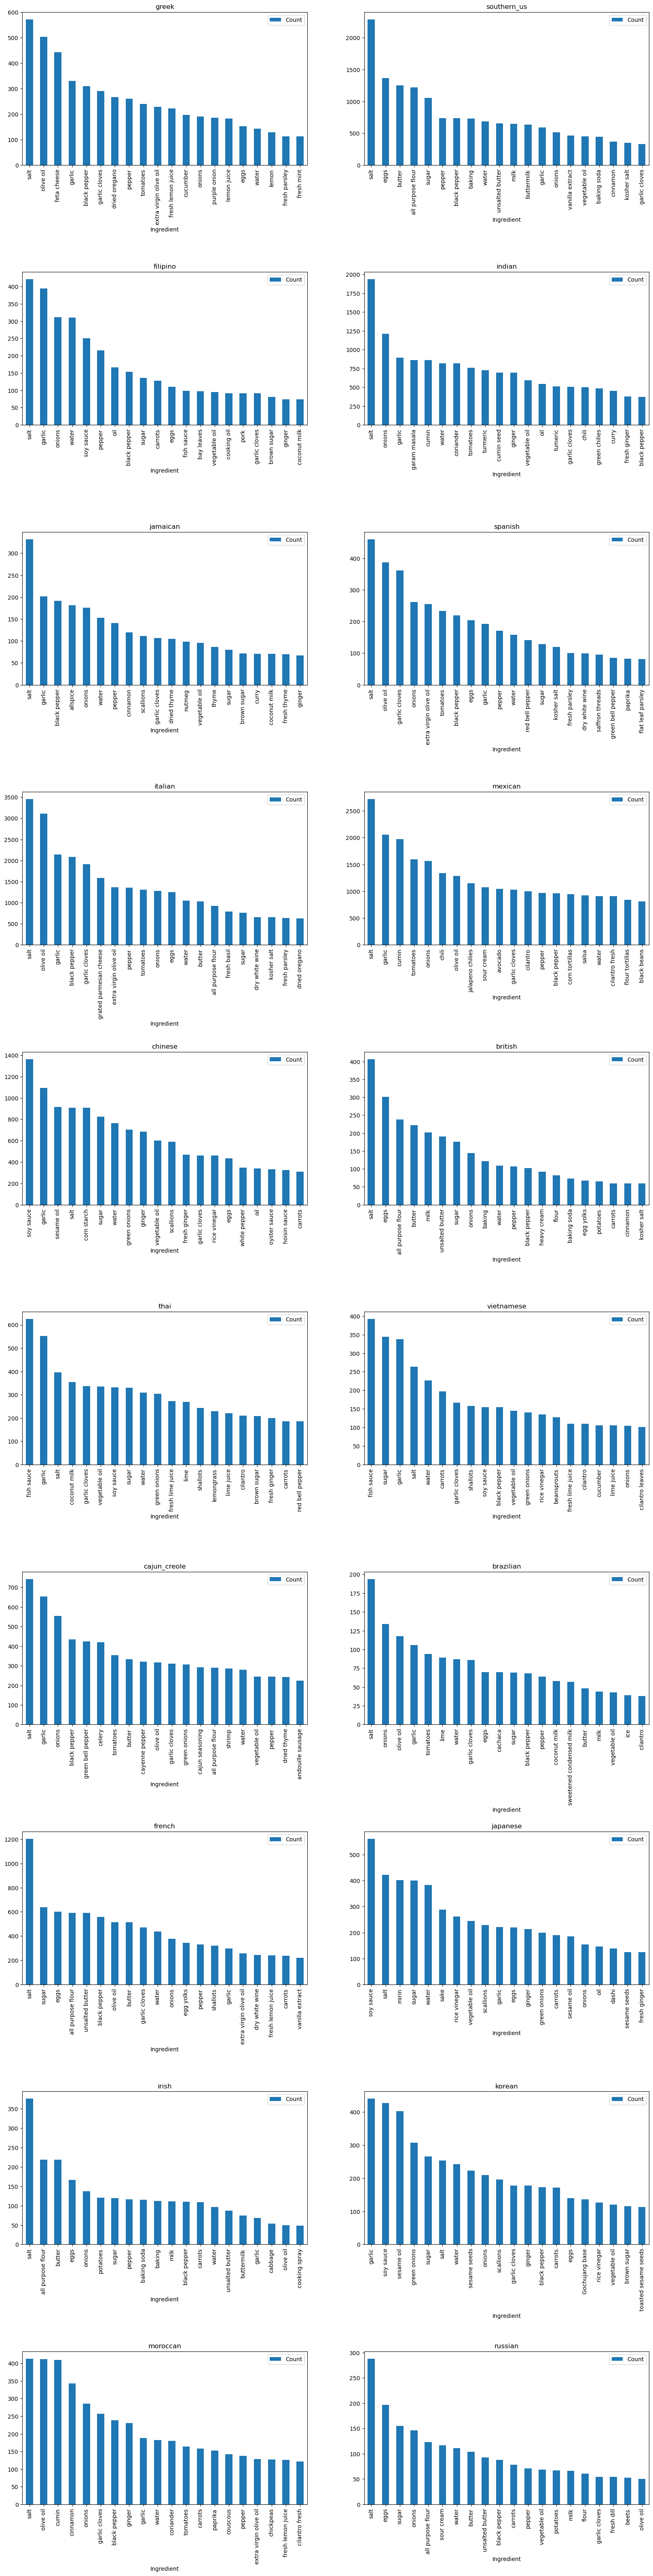

In [13]:
fig, axes = plt.subplots(10, 2, figsize=(20, 80))

idx = 0
for cuisine in counters.keys(): 
    top_20 = counters[cuisine].most_common(20)
    df = pd.DataFrame(top_20, columns = ['Ingredient', 'Count'])
    df.plot.bar(x='Ingredient',y='Count', ax=axes.ravel()[idx], title=cuisine)
    idx += 1
    
fig.subplots_adjust(hspace=0.7)
plt.show()

The charts provide interesting insight on the flavorings and type of fat/oil most commonly used in each cuisine.

### Model Preparation

Apply word lemmatization to make ingredients into their base words, and join them in a single string.

In [14]:
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize_strings(strs):
        strs = [" ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()]) for text in strs]
        strs = " ".join(strs)
        strs = strs.lower()
        return strs

train_df['ingredients'] = train_df['ingredients'].apply(lemmatize_strings)        
test_df['ingredients'] = test_df['ingredients'].apply(lemmatize_strings)        

Separate target from predictors

In [15]:
train_X = train_df['ingredients']
train_y = train_df['cuisine']

Vectorize text features using TFI-DF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                   ngram_range = ( 1 , 1 ),
                                   analyzer="word", 
                                   max_df = .57, 
                                   binary=False, 
                                   token_pattern=r'\w+', 
                                   sublinear_tf=False)

tfidf_train = tfidf_vectorizer.fit_transform(train_X)
tfidf_test = tfidf_vectorizer.transform(test_df['ingredients'])

Create a cluster feature using k-means clustering.

In [22]:
'''from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random

# perform clustering (K-Means)
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters_train = kmeans.fit_predict(tfidf_train)
clusters_test = kmeans.predict(tfidf_test)'''

'from sklearn.cluster import KMeans\nfrom sklearn.decomposition import PCA\nimport random\n\n# perform clustering (K-Means)\nnum_clusters = 3 \nkmeans = KMeans(n_clusters=num_clusters, random_state=42)\nclusters_train = kmeans.fit_predict(tfidf_train)\nclusters_test = kmeans.predict(tfidf_test)'

Encode cuisine labels to numerical format.

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train_y)
encoded_train_y = label_encoder.transform(train_y)

Split data into training and validations sets

In [24]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(tfidf_train, encoded_train_y, test_size = 0.2, random_state = 4, stratify = encoded_train_y)
print(sklearn.__version__)


1.4.1.post1


### Build and compile model

Building Logistic Regression model and tuning parameters using GridSearch CV.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(solver='liblinear')

classifier = GridSearchCV(model, {'C': [ 0.01, 0.1, 1, 10, 20, 30, 100]}, n_jobs=-1)
classifier.fit(X_train, y_train)

preds = classifier.predict(X_val)
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        93
           1       0.55      0.39      0.45       161
           2       0.79      0.72      0.75       309
           3       0.78      0.86      0.82       535
           4       0.71      0.60      0.65       151
           5       0.62      0.66      0.64       529
           6       0.86      0.71      0.78       235
           7       0.84      0.91      0.87       601
           8       0.66      0.47      0.55       133
           9       0.83      0.90      0.86      1568
          10       0.80      0.70      0.75       105
          11       0.83      0.68      0.75       284
          12       0.87      0.75      0.81       166
          13       0.92      0.93      0.92      1288
          14       0.78      0.75      0.77       164
          15       0.62      0.43      0.51        98
          16       0.71      0.81      0.76       864
          17       0.61    

Find best classifier parameters and create optimized model.

In [26]:
classifier.best_params_

{'C': 10}

Predict on test data with optimized classifier and send output to file.

In [27]:
best_classifier = LogisticRegression(solver='liblinear', C=10)
best_classifier.fit(X_train, y_train)
test_preds = best_classifier.predict(tfidf_test)
test_preds = label_encoder.inverse_transform(test_preds)
test_preds

array(['british', 'southern_us', 'italian', ..., 'italian', 'southern_us',
       'mexican'], dtype=object)

Trying LinearSVC model.

In [30]:
from sklearn.svm import LinearSVC

classifier_1 = GridSearchCV(LinearSVC(dual=True, max_iter=10000), {'C': [0.01, 0.1, 1, 10, 20, 30, 50, 100]}, n_jobs=-1)
classifier_1.fit(X_train, y_train)

preds = classifier_1.predict(X_val)
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68        93
           1       0.53      0.39      0.45       161
           2       0.79      0.72      0.75       309
           3       0.78      0.86      0.82       535
           4       0.70      0.58      0.63       151
           5       0.63      0.67      0.65       529
           6       0.83      0.73      0.78       235
           7       0.82      0.91      0.86       601
           8       0.65      0.47      0.54       133
           9       0.83      0.90      0.87      1568
          10       0.77      0.75      0.76       105
          11       0.86      0.68      0.76       284
          12       0.84      0.78      0.81       166
          13       0.92      0.92      0.92      1288
          14       0.76      0.77      0.76       164
          15       0.59      0.41      0.48        98
          16       0.72      0.81      0.76       864
          17       0.66    

In [31]:
classifier_1.best_params_

{'C': 1}

In [32]:
best_classifier_1 = LinearSVC(dual=True, max_iter=10000, C=1)
best_classifier_1.fit(X_train, y_train)
test_preds_1 = best_classifier_1.predict(tfidf_test)
test_preds_1 = label_encoder.inverse_transform(test_preds_1)

The first classifier performs better so we will output its results.

In [33]:
output = pd.DataFrame({'id': test_df['id'],
                           'cuisine': test_preds})
output.to_csv('submission.csv', index=False)